# Emotion Recognition CNN - Data Analysis & Model Evaluation

This notebook provides comprehensive analysis and evaluation of the emotion recognition CNN model trained on combined RAF-DB and FER-2013 datasets.

## 1. Import Required Libraries

In [1]:
import sys
# sys.path.insert(0, '/Users/romanminakov/Personal/Studies/Sem6/RI/RI-Project/src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import keras
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 2. Load Model and Dataset

In [2]:
from src.dataset_utils import get_combined_datasets

model_path = Path('models/best_model_20251017_181446.keras')
print(f"Loading model from: {model_path}")
model = keras.models.load_model(str(model_path))

print(f"\nModel loaded successfully!")
print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

print("\nLoading combined dataset (RAF-DB + FER-2013)...")
train_ds, val_ds, test_ds = get_combined_datasets(batch_size=32)

print("  Dataset loaded!")
print(f"  Train dataset: Available")
print(f"  Validation dataset: Available")
print(f"  Test dataset: Available")

Loading model from: models/best_model_20251017_181446.keras


2025-10-18 05:34:04.166228: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-10-18 05:34:04.166268: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-18 05:34:04.166275: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-10-18 05:34:04.166296: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-18 05:34:04.166308: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)



Model loaded successfully!
Model input shape: (None, 128, 128, 3)
Model output shape: (None, 7)

Loading combined dataset (RAF-DB + FER-2013)...
Dataset is already downloaded
Found 12271 files belonging to 7 classes.
Using 10431 files for training.
Found 12271 files belonging to 7 classes.
Using 1840 files for validation.
Found 3068 files belonging to 7 classes.
Dataset is already downloaded
Found 28709 files belonging to 7 classes.
Using 24403 files for training.
Found 28709 files belonging to 7 classes.
Using 4306 files for validation.
Found 7178 files belonging to 7 classes.
Applying data augmentation to training set...
  Dataset loaded!
  Train dataset: Available
  Validation dataset: Available
  Test dataset: Available


## 3. Define Emotion Labels and Extract Predictions

In [10]:
EMOTION_LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

print("Emotion Labels:")
for idx, emotion in enumerate(EMOTION_LABELS):
    print(f"  {idx}: {emotion}")

print("\nGenerating predictions on test set...")
all_predictions = []
all_true_labels = []
all_pred_probs = []

for images, labels in test_ds:
    pred_probs = model.predict(images, verbose=0)
    pred_classes = np.argmax(pred_probs, axis=1)
    
    all_predictions.extend(pred_classes)
    all_true_labels.extend(labels.numpy())
    all_pred_probs.extend(pred_probs)

all_predictions = np.array(all_predictions)
all_true_labels = np.array(all_true_labels)
all_pred_probs = np.array(all_pred_probs)

print(f"  Generated predictions for {len(all_predictions)} samples")

Emotion Labels:
  0: Angry
  1: Disgust
  2: Fear
  3: Happy
  4: Neutral
  5: Sad
  6: Surprise

Generating predictions on test set...
  Generated predictions for 10246 samples
  Generated predictions for 10246 samples


2025-10-18 06:41:25.935105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## 4. Overall Model Performance Metrics

In [4]:
accuracy = accuracy_score(all_true_labels, all_predictions)
precision_macro = precision_score(all_true_labels, all_predictions, average='macro', zero_division=0)
recall_macro = recall_score(all_true_labels, all_predictions, average='macro', zero_division=0)
f1_macro = f1_score(all_true_labels, all_predictions, average='macro', zero_division=0)

print("=" * 70)
print("OVERALL MODEL PERFORMANCE")
print("=" * 70)
print(f"Overall Accuracy:     {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Macro Precision:      {precision_macro:.4f}")
print(f"Macro Recall:         {recall_macro:.4f}")
print(f"Macro F1-Score:       {f1_macro:.4f}")
print("=" * 70)

baseline_accuracy = 1.0 / len(EMOTION_LABELS)
print(f"\nBaseline Accuracy (random): {baseline_accuracy:.4f} ({baseline_accuracy*100:.2f}%)")
print(f"Model improvement over baseline: {(accuracy - baseline_accuracy)*100:.2f}%")

OVERALL MODEL PERFORMANCE
Overall Accuracy:     0.6813 (68.13%)
Macro Precision:      0.6371
Macro Recall:         0.6135
Macro F1-Score:       0.6208

Baseline Accuracy (random): 0.1429 (14.29%)
Model improvement over baseline: 53.85%


## 5. Confusion Matrix Visualization



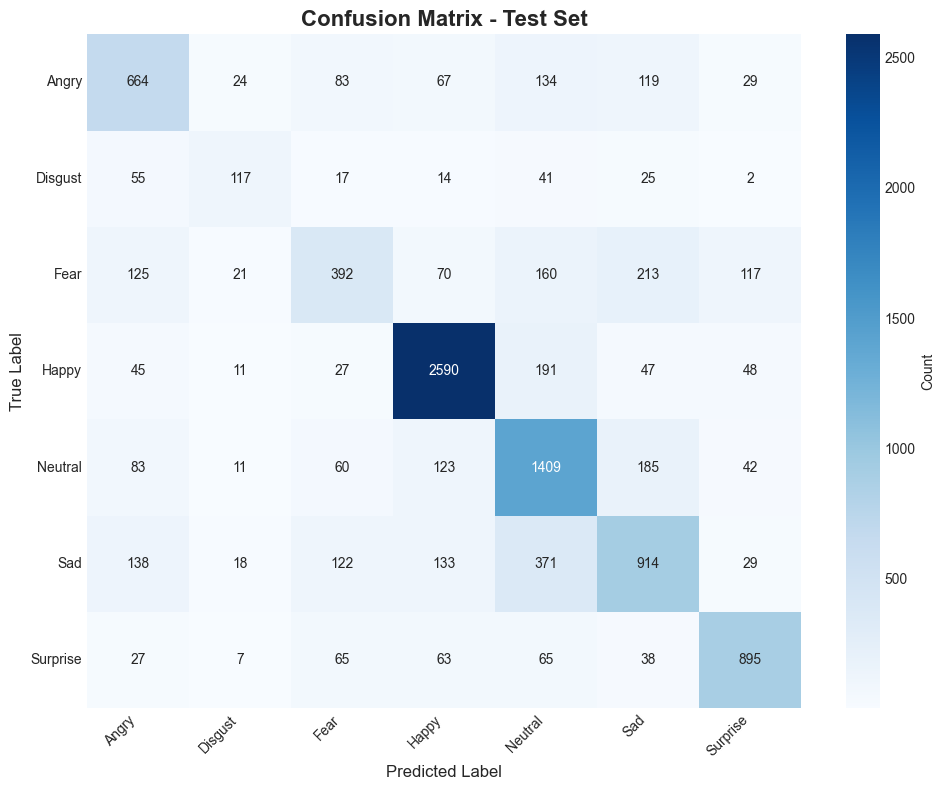

Confusion Matrix saved


In [5]:
cm = confusion_matrix(all_true_labels, all_predictions)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=EMOTION_LABELS, yticklabels=EMOTION_LABELS,
            cbar_kws={'label': 'Count'}, ax=ax)
plt.title('Confusion Matrix - Test Set', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Confusion Matrix saved")

## 5.1 Results interpritaion
1. **Happy** 
    - Strong diagonal value (2590), the largest on the matrix
    - Happy is rarely confused with other emotions
2. **Surprise** 
    - Strong diagonal
    - Occasionally confused with Happy 
3. **Sad**
    - Strong diagonal but also significant off-diagonal confusion
    - Mostly confused with Neutral (371) and Fear (122)
4. **Fear** 
    - Weak diagonal, many misclassifications
    - Primarily misclassified as Sad (122)
5. **Angry** 
    - Strong diagonal but significant confusion
    - Confused with Fear (83), Neutral (134), and Sad (119)
6. **Disgust**
    - Weak diagonal, mostly gets classified as other emotions
    - Often misclassified as Fear (21), Angry (24), and others
7. **Neutral**
    - String diagonal, but scattered confusion
    - Confused with many classes (Sad: 371, Happy: 191, Fear: 160)

## 6. Per-Class Performance Metrics


Detailed Classification Report:
              precision  recall  f1-score     support
Angry            0.5840  0.5929    0.5884   1120.0000
Disgust          0.5598  0.4317    0.4875    271.0000
Fear             0.5117  0.3570    0.4206   1098.0000
Happy            0.8464  0.8753    0.8606   2959.0000
Neutral          0.5943  0.7365    0.6578   1913.0000
Sad              0.5931  0.5299    0.5597   1725.0000
Surprise         0.7702  0.7716    0.7709   1160.0000
accuracy         0.6813  0.6813    0.6813      0.6813
macro avg        0.6371  0.6135    0.6208  10246.0000
weighted avg     0.6759  0.6813    0.6751  10246.0000


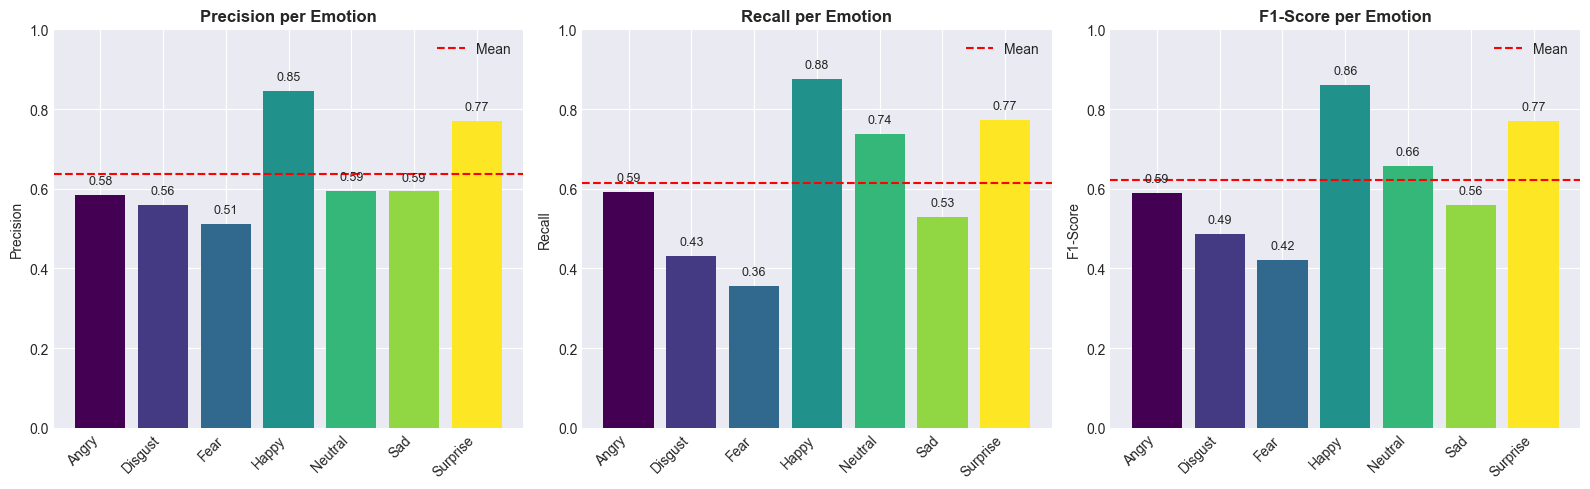

In [6]:
class_report = classification_report(all_true_labels, all_predictions, 
                                     target_names=EMOTION_LABELS, 
                                     output_dict=True)

report_df = pd.DataFrame(class_report).transpose()
print("\nDetailed Classification Report:")
print(report_df.round(4))

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

metrics = ['precision', 'recall', 'f1-score']
for idx, metric in enumerate(metrics):
    values = [class_report[emotion][metric] for emotion in EMOTION_LABELS]
    colors = plt.cm.viridis(np.linspace(0, 1, len(EMOTION_LABELS)))
    
    axes[idx].bar(EMOTION_LABELS, values, color=colors)
    axes[idx].set_title(f'{metric.title()} per Emotion', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(metric.title(), fontsize=10)
    axes[idx].set_ylim([0, 1])
    axes[idx].axhline(y=np.mean(values), color='red', linestyle='--', label='Mean')
    axes[idx].legend()
    
    axes[idx].set_xticklabels(EMOTION_LABELS, rotation=45, ha='right')
    
    for i, v in enumerate(values):
        axes[idx].text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 6.1 Per-Class Performance Analysis

**Happy: 0.8606 F1-Score**
- Precision: 0.8464 | Recall: 0.8753 | Support: 2,959 samples

**Surprise: 0.7709 F1-Score**
- Precision: 0.7702 | Recall: 0.7716 | Support: 1,160 samples

**Neutral: 0.6578 F1-Score**
- Precision: 0.5943 | Recall: 0.7365 | Support: 1,913 samples
- Recall (73.65%) significantly exceeds Precision (59.43%), indicating the model over-predicts Neutral.

**Angry: 0.5884 F1-Score**
- Precision: 0.5840 | Recall: 0.5929 | Support: 1,120 samples
- The model misses 41% of actual Angry instances.
- Performance is limited by feature overlap with Disgust, Fear, and Sad emotions.

**Sad: 0.5597 F1-Score**
- Precision: 0.5931 | Recall: 0.5299 | Support: 1,725 samples
- The model misses 47% of actual Sad instances.
- Sad is frequently confused with Neutral and Fear

**Disgust: 0.4875 F1-Score**
- Precision: 0.5598 | Recall: 0.4317 | Support: 271 samples
- Recall (43.17%) is significantly lower than Precision (55.98%).
- The model fails to identify 57% of actual Disgust instances.

**Fear: 0.4206 F1-Score**
- Precision: 0.5117 | Recall: 0.3570 | Support: 1,098 samples
- Recall (35.70%) is greatly lower than Precision (51.17%).
- The model fails to identify 64.3% of actual Fear instances.
- Fear is frequently confused with Sad, Surprise, and Angry


# 7. Prediction Confidence

Correct Predictions: 6981
  Mean Confidence: 0.8636
  Min Confidence: 0.2436
  Max Confidence: 1.0000
  Std Dev: 0.1798

Incorrect Predictions: 3265
  Mean Confidence: 0.6677
  Min Confidence: 0.2161
  Max Confidence: 1.0000
  Std Dev: 0.1996


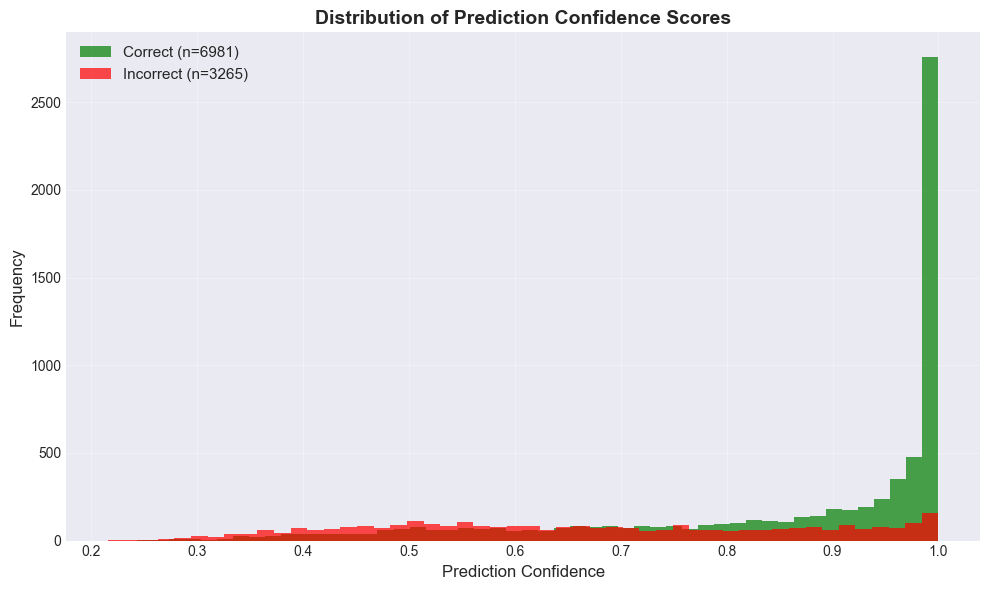

In [7]:
max_probs = np.max(all_pred_probs, axis=1)

correct_mask = all_predictions == all_true_labels
correct_probs = max_probs[correct_mask]
incorrect_probs = max_probs[~correct_mask]

print(f"Correct Predictions: {len(correct_probs)}")
print(f"  Mean Confidence: {np.mean(correct_probs):.4f}")
print(f"  Min Confidence: {np.min(correct_probs):.4f}")
print(f"  Max Confidence: {np.max(correct_probs):.4f}")
print(f"  Std Dev: {np.std(correct_probs):.4f}")

print(f"\nIncorrect Predictions: {len(incorrect_probs)}")
if len(incorrect_probs) > 0:
    print(f"  Mean Confidence: {np.mean(incorrect_probs):.4f}")
    print(f"  Min Confidence: {np.min(incorrect_probs):.4f}")
    print(f"  Max Confidence: {np.max(incorrect_probs):.4f}")
    print(f"  Std Dev: {np.std(incorrect_probs):.4f}")

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(correct_probs, bins=50, alpha=0.7, label=f'Correct (n={len(correct_probs)})', color='green')
if len(incorrect_probs) > 0:
    ax.hist(incorrect_probs, bins=50, alpha=0.7, label=f'Incorrect (n={len(incorrect_probs)})', color='red')

ax.set_xlabel('Prediction Confidence', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Prediction Confidence Scores', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 7.1 Confidence Score Analysis

**Good Indicators:**
1. Correct predictions have higher mean confidence (0.8636) than incorrect predictions (0.6677)
2. Most incorrect predictions have lower confidence

**Bad Indicators:**
1. Some incorrect predictions reach 1.0000 confidence
2. Some correct predictions have very low confidence (0.2436), suggesting the model is sometimes lucky
3. The standard deviation for incorrect predictions (0.1996) is higher than for correct predictions (0.1798)


## 8. Emotion Distribution in Test Set

Analyze the distribution of emotions in the test dataset.

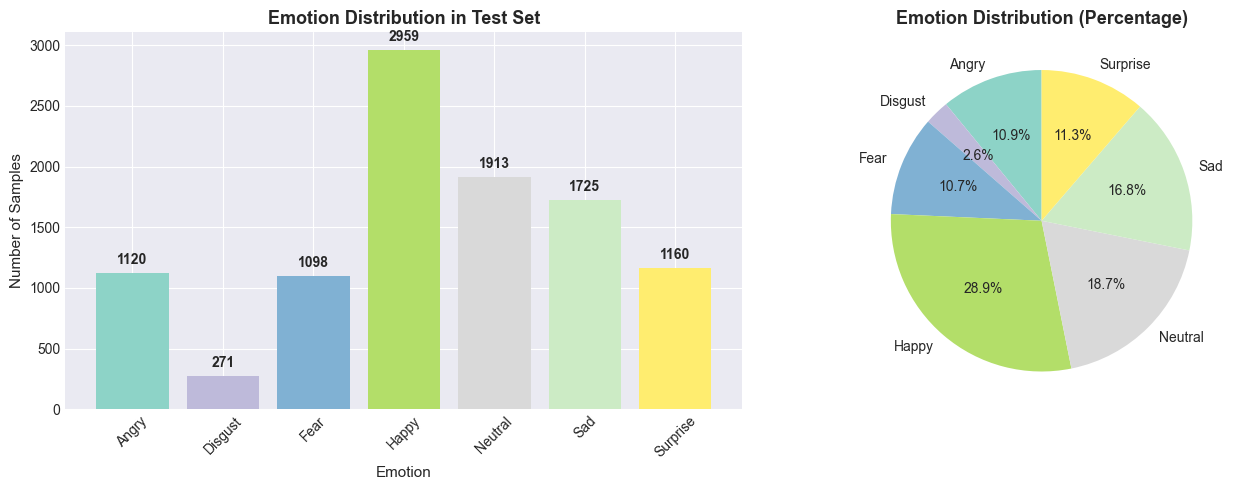


Emotion Distribution in Test Set:
  Angry       :  1120 samples (10.93%)
  Disgust     :   271 samples ( 2.64%)
  Fear        :  1098 samples (10.72%)
  Happy       :  2959 samples (28.88%)
  Neutral     :  1913 samples (18.67%)
  Sad         :  1725 samples (16.84%)
  Surprise    :  1160 samples (11.32%)


In [8]:
emotion_counts = pd.Series(all_true_labels).value_counts().sort_index()
emotion_names = [EMOTION_LABELS[i] for i in emotion_counts.index]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = plt.cm.Set3(np.linspace(0, 1, len(EMOTION_LABELS)))
axes[0].bar(emotion_names, emotion_counts.values, color=colors)
axes[0].set_title('Emotion Distribution in Test Set', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Number of Samples', fontsize=11)
axes[0].set_xlabel('Emotion', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(emotion_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[1].pie(emotion_counts.values, labels=emotion_names, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Emotion Distribution (Percentage)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nEmotion Distribution in Test Set:")
for emotion, count in zip(emotion_names, emotion_counts.values):
    percentage = (count / len(all_true_labels)) * 100
    print(f"  {emotion:<12}: {count:>5} samples ({percentage:>5.2f}%)")

## 9. Model Summary and Architecture

Display the trained model architecture and parameter information.

In [9]:
print("Model Architecture:")
print("=" * 70)
model.summary()

total_params = model.count_params()
print(f"\nTotal Model Parameters: {total_params:,}")

print(f"\nModel Input Shape: {model.input_shape}")
print(f"Model Output Shape: {model.output_shape}")
print(f"Number of Layers: {len(model.layers)}")
print(f"Number of Emotion Classes: {len(EMOTION_LABELS)}")

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,324,727 (16.50 MB)

 Trainable params: 1,440,423 (5.49 MB)

 Non-trainable params: 3,456 (13.50 KB)

 Optimizer params: 2,880,848 (10.99 MB)


Total Model Parameters: 1,443,879

Model Input Shape: (None, 128, 128, 3)
Model Output Shape: (None, 7)
Number of Layers: 32
Number of Emotion Classes: 7
